In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Sistemi intelligenti per internet\\beer_data\\beer_reviews.csv')

#visualizzo le prime righe per controllare la struttura 

In [4]:
print(df.head())

   brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stou

In [5]:
import re

In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
from nltk.corpus import stopwords

#porzione di codice non utlizzata per 'pulire' la parte testuale di un eventuale colonna di recensioni

In [8]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]','',text)  #converte i caratteri speciali
    text = text.lower() #converte il minuscolo
    text = text.split() #tokenizza il testo
    stops = set(stopwords.words('english'))
    text = [word for word in text if word not in stops] # rimuove le stopwords
    return ''.join(text)

In [9]:
avg_ratings_by_style = df.groupby('beer_style')['review_overall'].mean()

In [10]:
top_style = avg_ratings_by_style.sort_values(ascending=False)
print(top_style.head(10))

beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
Russian Imperial Stout              4.023084
Weizenbock                          4.007969
American Double / Imperial IPA      3.998017
Flanders Red Ale                    3.992722
Rye Beer                            3.981737
Name: review_overall, dtype: float64


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt


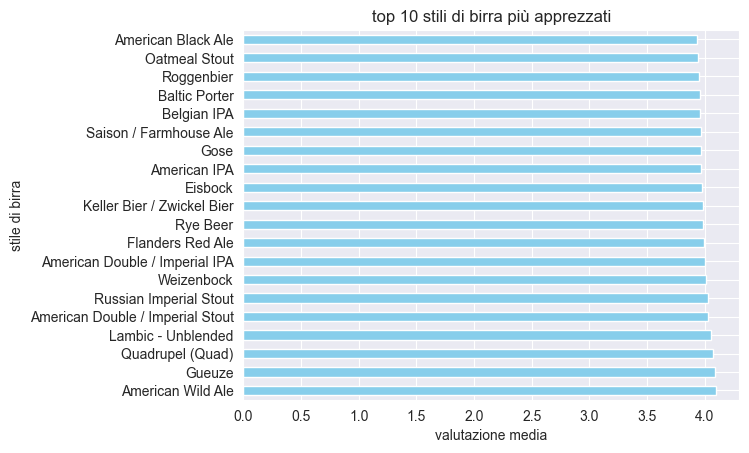

In [13]:
top_style.head(20).plot(kind='barh',color='skyblue')
plt.title('top 10 stili di birra più apprezzati')
plt.xlabel('valutazione media')
plt.ylabel('stile di birra')
plt.show()

In [14]:
all_style = avg_ratings_by_style.sort_values(ascending=False)
print(all_style)

beer_style
American Wild Ale                   4.093262
Gueuze                              4.086287
Quadrupel (Quad)                    4.071630
Lambic - Unblended                  4.048923
American Double / Imperial Stout    4.029820
                                      ...   
Happoshu                            2.914938
Euro Strong Lager                   2.862518
Light Lager                         2.698833
American Malt Liquor                2.678854
Low Alcohol Beer                    2.578268
Name: review_overall, Length: 104, dtype: float64


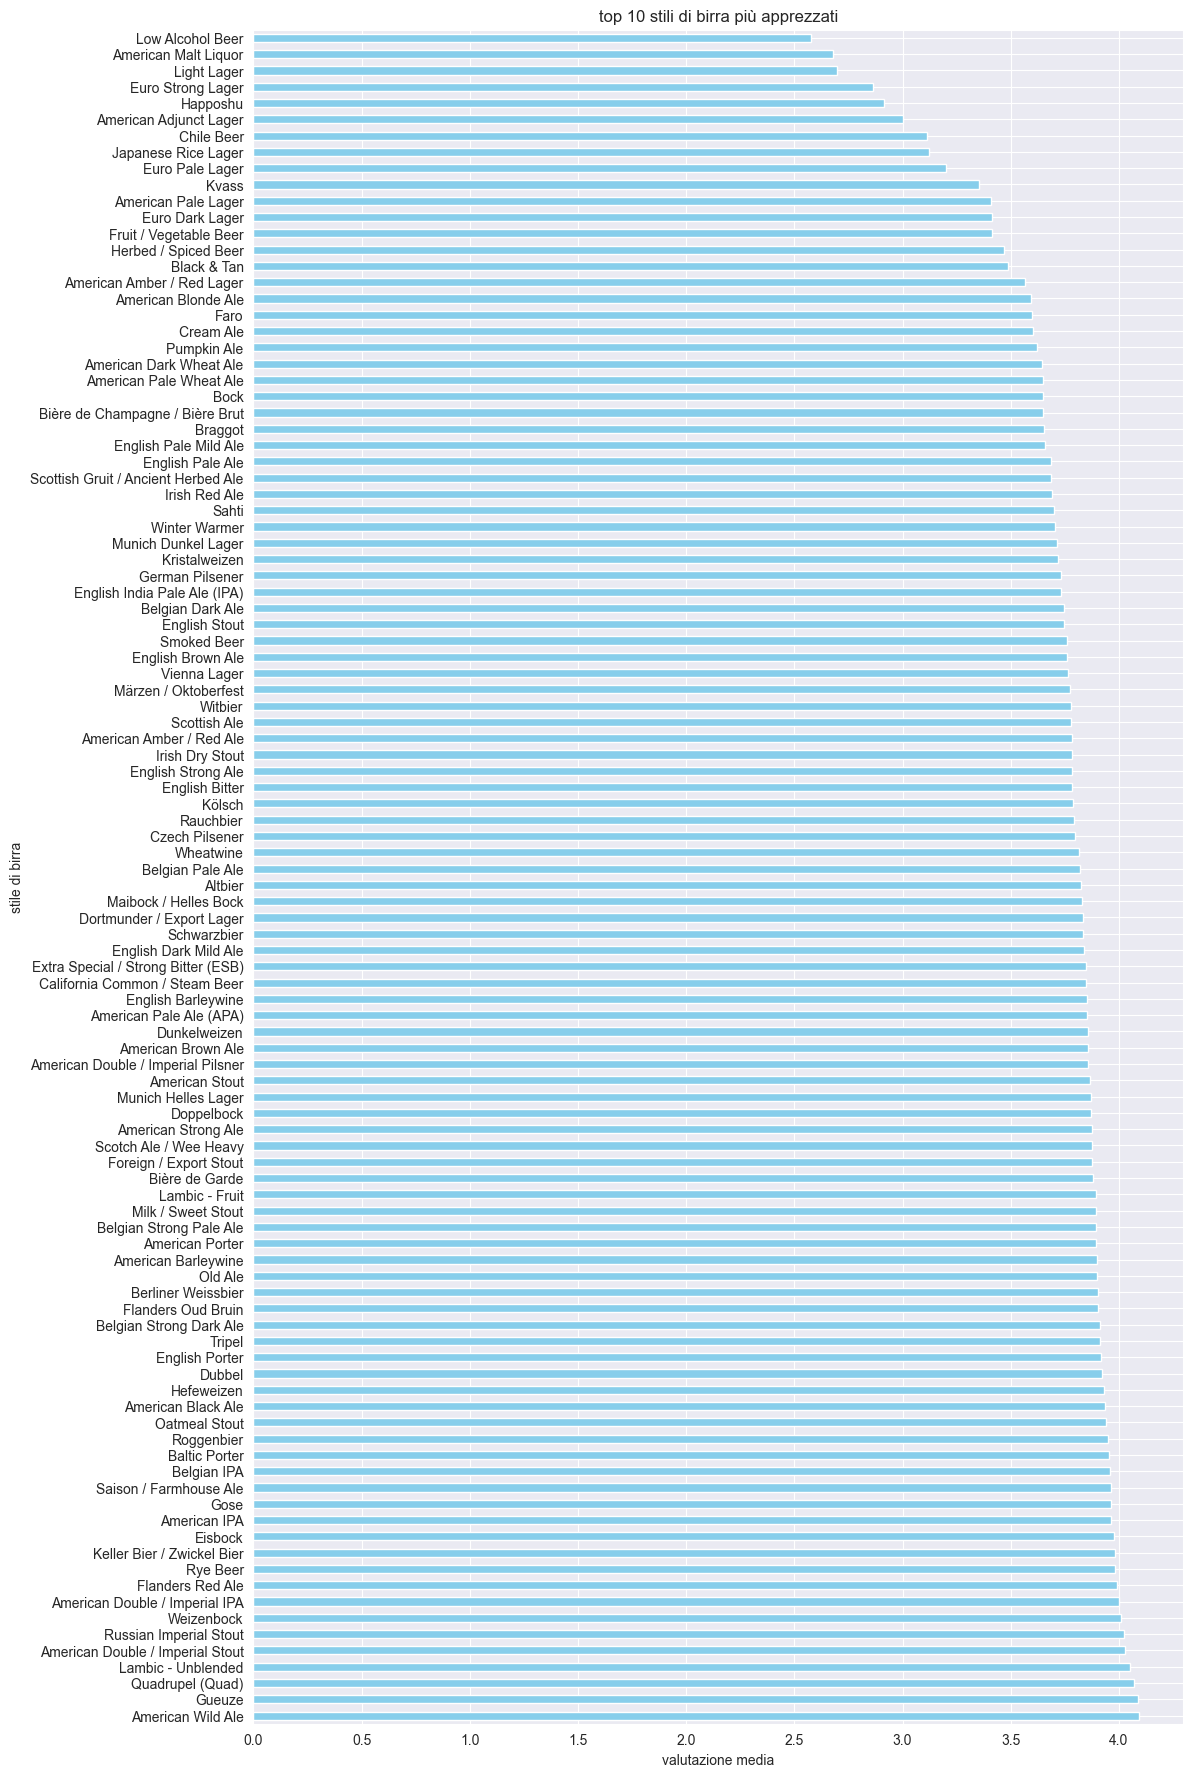

In [15]:
all_style.plot(kind='barh',figsize=(12,22), color='skyblue')
plt.title('top 10 stili di birra più apprezzati')
plt.xlabel('valutazione media')
plt.ylabel('stile di birra')
plt.show()

C:\Users\CRAIA-AREA EDUCATORI\AppData\Local\Temp\ipykernel_7704\2616615715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beer_style', y='review_overall', data=selected_styles, palette='coolwarm')


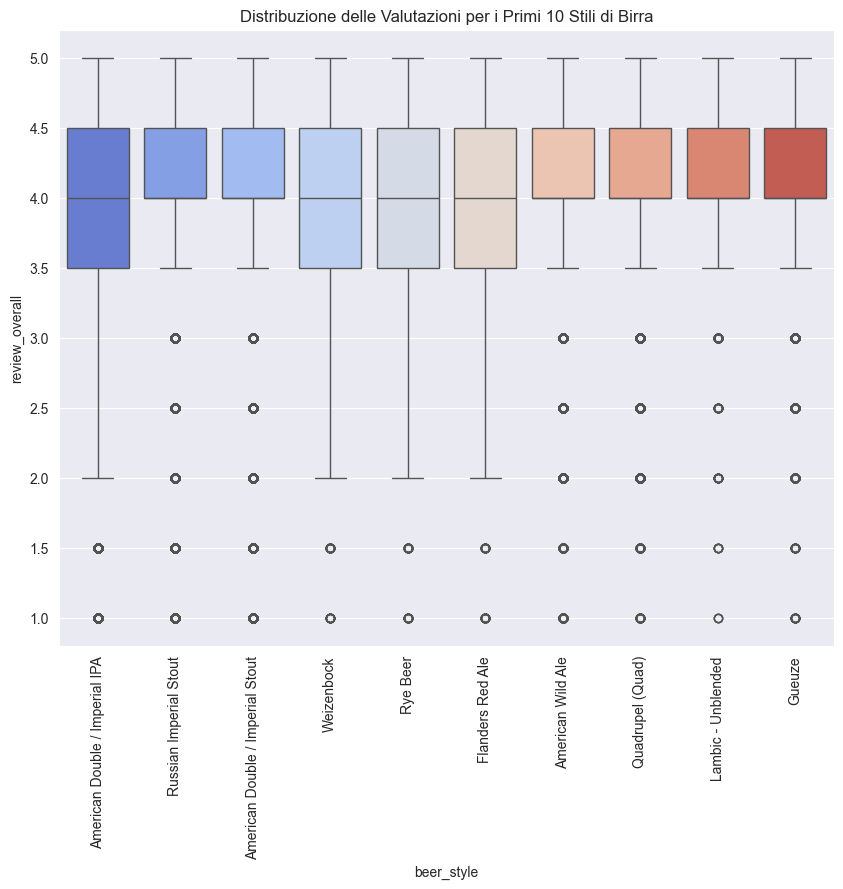

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleziona alcuni stili di birra e visualizza la distribuzione delle valutazioni
selected_styles = df[df['beer_style'].isin(top_style.index[:10])]  # I primi 10 stili

# Visualizza le distribuzioni con seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(x='beer_style', y='review_overall', data=selected_styles, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Distribuzione delle Valutazioni per i Primi 10 Stili di Birra')
plt.show()


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Calcola la deviazione standard delle valutazioni per ogni stile
std_ratings_by_style = df.groupby('beer_style')['review_overall'].std()

# Ordina per gli stili con minore varianza
least_controversial_styles = std_ratings_by_style.sort_values(ascending=True)

print("Stili con la minore varianza nelle recensioni:")
print(least_controversial_styles.head(10))


Stili con la minore varianza nelle recensioni:
beer_style
Roggenbier                0.531308
American Black Ale        0.562235
Belgian IPA               0.572613
Baltic Porter             0.590558
Rye Beer                  0.593064
Weizenbock                0.598310
Scotch Ale / Wee Heavy    0.606551
American IPA              0.610760
Bière de Garde            0.616042
Saison / Farmhouse Ale    0.618310
Name: review_overall, dtype: float64


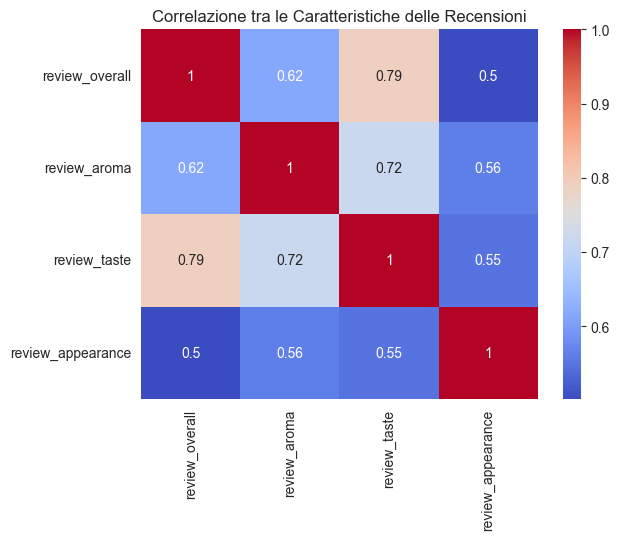

In [19]:
# Correlazione tra le diverse caratteristiche
correlation_matrix = df[['review_overall', 'review_aroma', 'review_taste', 'review_appearance']].corr()

# Visualizza la matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlazione tra le Caratteristiche delle Recensioni')
plt.show()


In [20]:
# Funzione per classificare le recensioni
def classify_review(rating):
    if rating <= 2:
        return 'Non mi piace'
    elif 2.5 <= rating <= 3.5:
        return 'Ok'
    else:
        return 'Mi piace'

# Applica la classificazione alle recensioni
df['rating_class'] = df['review_overall'].apply(classify_review)

# Visualizza un esempio
print(df[['beer_style', 'review_overall', 'rating_class']].head())


                       beer_style  review_overall  rating_class
0                      Hefeweizen             1.5  Non mi piace
1              English Strong Ale             3.0            Ok
2          Foreign / Export Stout             3.0            Ok
3                 German Pilsener             3.0            Ok
4  American Double / Imperial IPA             4.0      Mi piace


In [21]:
# Calcola la percentuale di recensioni per ciascuna categoria in ogni stile
rating_distribution = df.groupby(['beer_style', 'rating_class']).size().unstack().fillna(0)

In [22]:
# Calcola la percentuale
rating_distribution_percent = rating_distribution.div(rating_distribution.sum(axis=1), axis=0) * 100

In [23]:
# Visualizza i risultati ordinati per percentuale di "Mi piace"
top_liked_styles = rating_distribution_percent.sort_values(by='Mi piace', ascending=False)
print(top_liked_styles.head(10))

rating_class                       Mi piace  Non mi piace         Ok
beer_style                                                          
Gueuze                            79.147945      2.229988  18.622067
American Wild Ale                 78.880522      2.096212  19.023266
Quadrupel (Quad)                  76.302112      1.564746  22.133142
American Double / Imperial Stout  75.850508      2.392269  21.757223
Russian Imperial Stout            75.815182      2.056199  22.128619
Lambic - Unblended                75.493716      2.154399  22.351885
Weizenbock                        74.734382      1.487463  23.778156
Rye Beer                          73.711747      1.470879  24.817374
American Double / Imperial IPA    73.654582      1.992393  24.353025
Flanders Red Ale                  72.779112      2.536014  24.684874


In [24]:
# Calcola la media delle valutazioni per ogni stile
avg_ratings_by_style = df.groupby('beer_style')['review_overall'].mean()

#Per capire se le valutazioni negative di un utente sono una questione di gusto personale o riflettono una tendenza generale, possiamo confrontare la valutazione dell'utente con la media delle valutazioni per quello stile di birra.

In [25]:
# Confronta la valutazione dell'utente con la media per quello stile
df['user_vs_avg'] = df.apply(lambda row: 'Personale' if row['review_overall'] < avg_ratings_by_style[row['beer_style']] else 'Comune', axis=1)

In [26]:
# Visualizza gli esempi dove l'utente ha dato una recensione negativa
negative_reviews = df[df['rating_class'] == 'Non mi piace']
print(negative_reviews[['review_profilename', 'beer_style', 'review_overall', 'user_vs_avg']].head(10))

    review_profilename               beer_style  review_overall user_vs_avg
0              stcules               Hefeweizen             1.5   Personale
16          RedDiamond            Oatmeal Stout             2.0   Personale
261               rand  Belgian Strong Dark Ale             2.0   Personale
325          IronLover   American Adjunct Lager             2.0   Personale
328         kevinmkirk   American Adjunct Lager             1.0   Personale
332          jmarsh123      American Blonde Ale             1.5   Personale
334     TheGordianKnot      American Blonde Ale             1.5   Personale
462       ShadesOfGray             American IPA             1.0   Personale
530           velosuds             American IPA             2.0   Personale
547         Arbitrator             American IPA             2.0   Personale


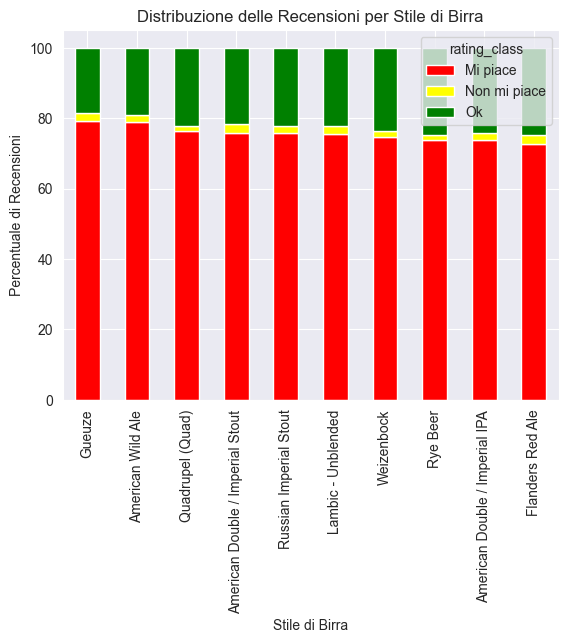

In [27]:
# Grafico a barre delle percentuali di recensioni per i primi 10 stili più apprezzati
top_liked_styles.head(10).plot(kind='bar', stacked=True, color=['red', 'yellow', 'green'])
plt.title('Distribuzione delle Recensioni per Stile di Birra')
plt.xlabel('Stile di Birra')
plt.ylabel('Percentuale di Recensioni')
plt.show()

In [28]:
import numpy as ap
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[ap.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.ap.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [29]:
import numpy as ap
plotScatterMatrix(df, 20, 10)

TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given